In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

db = pd.read_csv('profiles.csv', encoding='utf-8')

db.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [2]:
print(db.columns)
print(db['status'].unique())

# Since status is a thing. Im going to use that as labels
# If someone is married at least someone sees something in them. And thus they are likely desierable
# seeing someone could just mean 'im kinda hot at least'

# looking at this id like to use 'body_type', 'smokes', 'job', 'income', 'height', 'ethnicity'
# While ethnicity will likely be removed in the final of the model. While developing it can give information
# on possible biases of the dataset; those biases could be accounted for in the final model

# But first I'll explore the dataset. More questions and insights are likely to arise, that could shift the final outcome

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
['single' 'available' 'seeing someone' 'married' 'unknown']


In [3]:
body_types = db['body_type']
body_types.unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

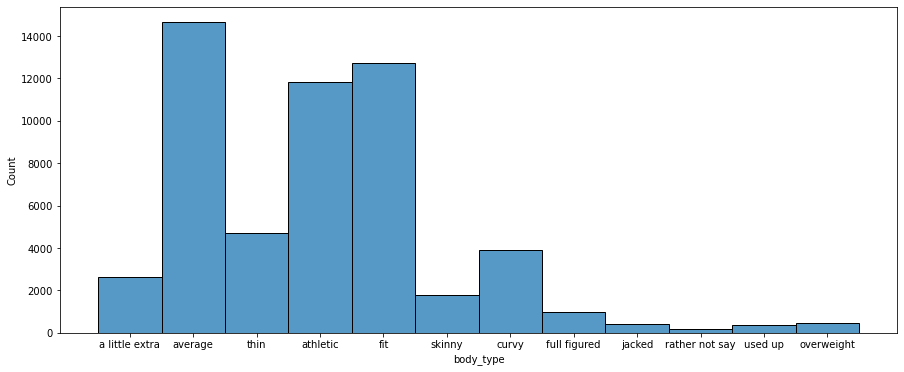

In [4]:
f, ax = plt.subplots(figsize=(15,6))
ax = sns.histplot(body_types)

# Few things about body type. When asked about it people are terrible at judging their own body type, especialy men.
# From an old article I read, a lot of men(in particular young men) about 70-ish% see themselves as physicaly fit,
# and of that group of men, only about 15-17% are actualy physicaly fit. Uncertan about wommen, and while the source is
# just some article I read x years ago, I still belieave it holds some credibility due the way testosterone affects us.

# but in general I see this more as an indicect question about their confidence, 
# rather than a testament to their actual body type.

# And confidence (at least from what I know) can have a huge impact on attractiveness.
# However, if the difference between matches is to large it could be intimidating.

In [5]:
diet = db['diet']
diet.unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

<Figure size 432x288 with 0 Axes>

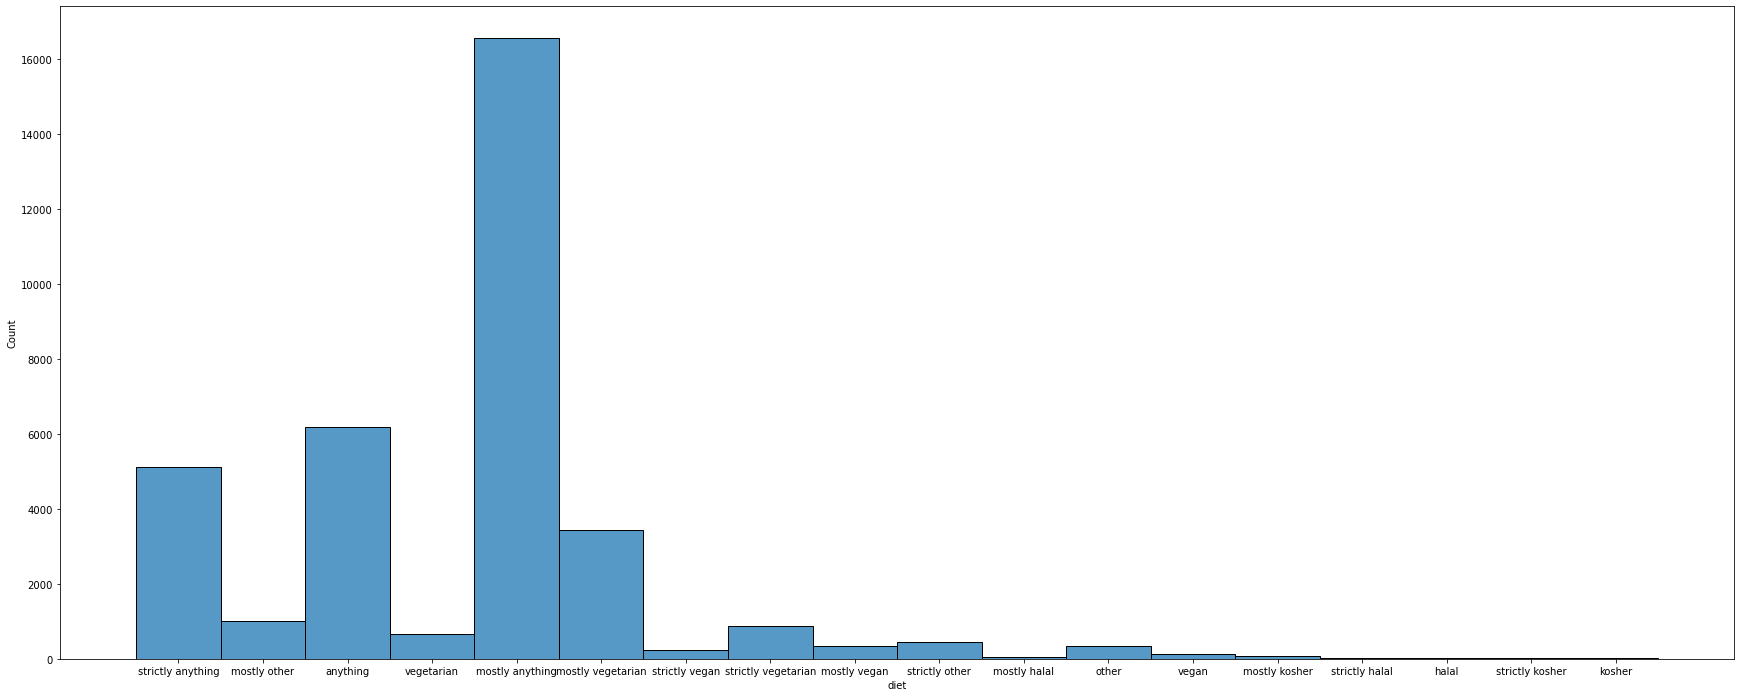

In [6]:
plt.clf()
f, ax = plt.subplots(figsize=(30,12))
ax = sns.histplot(diet)

# 'mostly other', 'anything' and 'mostly anything' problary go with any match
# but for 'strictly vegan', 'strictly vegetarian' and 'vegan' it might be a dealbreaker to be paired with
# someone who has a compleatly different diet. I personaly don't know a lot about diets themselves, so I will keep to what 
# I do know.

# When someone is strict with a type-diet, its seldom realy for health/medical reasons. The people is question might convince
# themselves it is, but it's very often more about: an ideology, a belief, joining a group of people, justifying behaviour.
# This is the main reason why different strict type-diets can be a dealbreaker.

# When someone is 'mostly' x diet, its less likely to be a dealbreaker if the match has another diet.

# However, I see these prefixes are not a great representation of how strict they realy are.
# for instance I could say that 'vegan' is a stricter form of 'vegitarian'.
# So 'mostly vegan' might be stricter than 'strictly vegitarian'.
# That it turn means that 'strict vegan' might not be the same as 'strictly kosher'.

In [7]:
drinks = db['drinks']
drinks.unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

<Figure size 432x288 with 0 Axes>

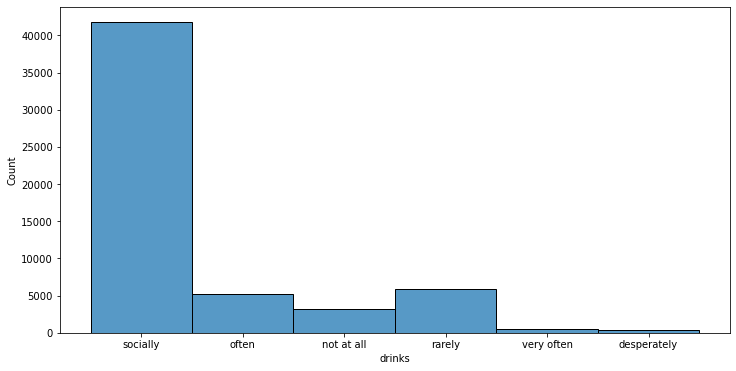

In [8]:
plt.clf()
f, ax = plt.subplots(figsize=(12,6))
ax = sns.histplot(drinks)

# Category of people who dont drink can contain people with drinking issues. Whenever it is: dealing with alhoholism
# in close relationships, previusly alcoholic, being a violent alcoholic, religion or just someone wanting to settle down and
# have babies in a safe environment. while people who simply does not like alcohol still belongs in this group. 
# The risk of pairing someone who drinks 'very often' and with this group could be problematic.

# Since less likely that 'social' and 'often' have issues with alcohol, then it is less likely to be a dealbreaker
# to them if sombody drinks 'rarely' or 'very often'. 

# In other words, 'not at all' should not be paired with 'very often'. In some cases this might be fine,
# but when its a problem it could be a huge issue. 


<Figure size 432x288 with 0 Axes>

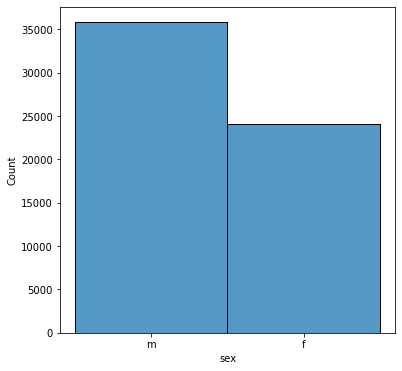

In [9]:
sex = db['sex']

plt.clf()
f, ax = plt.subplots(figsize=(6,6))
ax = sns.histplot(sex)

# More male than female on a dating app is standard. This is likely to increase even further as the dating app increases in
# popularity. 

In [10]:
male = db[db['sex'] == 'm']
female = db[db['sex'] == 'f']

male.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [11]:
print('Average male age: ' ,male.age.mean())
print('Average female age: ' ,female.age.mean())

Average male age:  32.01858829439839
Average female age:  32.81821951320645


<AxesSubplot:xlabel='age', ylabel='Count'>

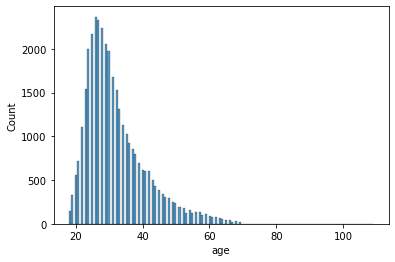

In [12]:
sns.histplot(male.age)

<AxesSubplot:xlabel='age', ylabel='Count'>

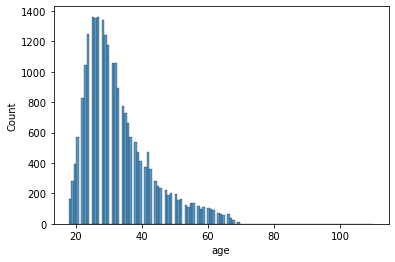

In [13]:
sns.histplot(female.age)

<AxesSubplot:xlabel='education', ylabel='age'>

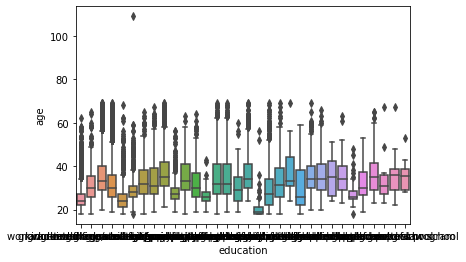

In [14]:
sns.boxplot(x=male.education, y=male.age)

In [15]:
# woah, expected education to have far fewer groups

male.education.unique()

# I would like to group these into low, med, high eduaction (simply to get a better overview).
# But so manny of these don't even make sence to me, like 'dropped out of space camp'. . . WHAT??

# Is space camp real? Is there a secret space camp while the rest of us imbeciles are stuck on some lame summer camp?
# Why is space camp so popular? Is it nasa? Is it satire? Are people bonking at space camp like a summer camp?
# If you drop out of space camp, how have you not died? are people droping out of space camp immortal?
# What are the pre-requirements for attending space camp? Guessing a first is realising those who drop out of it
# arent immortal?

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'working on masters program', 'graduated from space camp',
       'college/university', 'graduated from ph.d program',
       'working on ph.d program', 'two-year college',
       'dropped out of space camp', 'working on med school',
       'dropped out of college/university',
       'graduated from two-year college', 'dropped out of high school',
       'graduated from law school', 'working on high school',
       'graduated from high school', 'dropped out of two-year college',
       'dropped out of med school', 'high school',
       'graduated from med school', 'dropped out of ph.d program',
       'law school', 'masters program', 'working on law school',
       'space camp', 'dropped out of masters program', 'ph.d program',
       'dropped out of law school', 'med school'], dtype=object)

In [16]:
space_camp_male = male['education'].str.contains('space camp')
space_camp_male.value_counts()

# 1196 men of this group has attended space camp in some form. With a number that high this might be legit
# lets see about the females

False    30392
True      1196
Name: education, dtype: int64

In [17]:
space_camp_female = female['education'].str.contains('space camp')
space_camp_female.value_counts()

# 487 females has attended space camp. These numbers actualy seem reasonable
# if space camp actualy exist it should be placed in the high category
# But how can I know whenever or not this is a running meme?
# If people base their profile on a meme they will most likely write a bunch of satirical content on their profiles
# however if the rest of their profile is serius, space camp might be real.

False    21243
True       487
Name: education, dtype: int64

<AxesSubplot:xlabel='income', ylabel='education'>

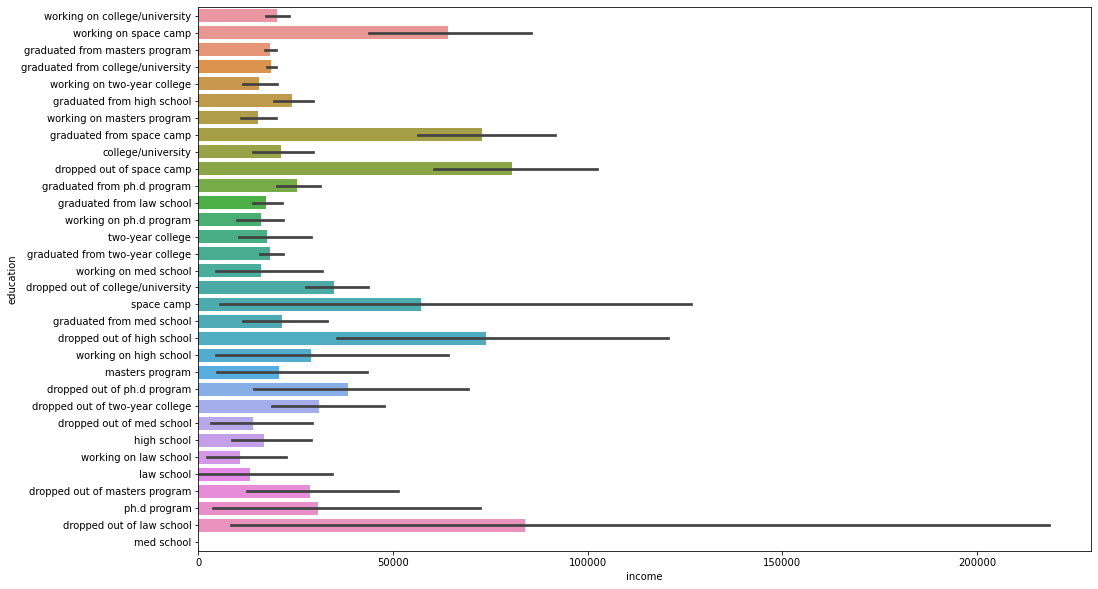

In [18]:
plt.figure(figsize=(16, 10))

sns.barplot(data=db, y="education", x="income")

# looking at this, it seems like droping out of space camp or law school is the way to go, altho dropping out of
# law school seems hit or miss.

# However. . . Seeing 'droped out of high school' making more income than 'graduated from med school'.
# People are undoubtably questionable souces. From this I guess the takeaway is that people on dating apps are realy
# insecure about their income. As these results are very far from expected 
# values (with what appears to be quite a few outliners) I will have to say, people lie about their income to seem attractive

# That in turn means this might not be part of the final model. Altho im kinda curious. . . does it work?
# If it works, and the model sees an importance in this, I will keep it in.

In [19]:
print(db.smokes.value_counts())
print(db.job.value_counts())
print(db.income.mean())
print(db.body_type.value_counts())
print(db.height.head())
print(db.ethnicity.value_counts())

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military     

In [20]:
# some fixes

db['sex_int'] = db['sex'].apply(lambda x: 0 if x == 'male' else 1)
db['is_married'] = db['status'].apply(lambda x: 'yes' if x == 'married' else 'no')
db['job_short'] = db.job.str.split().str.get(0)
db['ethnicity_short'] = db.ethnicity.str.split().str.get(0)

In [21]:
print(db.smokes.value_counts())
print(db.job_short.value_counts())
print(db.income.mean())
print(db.body_type.value_counts())
print(db.height.head())
print(db.ethnicity_short.value_counts())
print(db.is_married.value_counts())

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64
other             7589
student           4882
science           4848
computer          4709
artistic          4439
sales             4391
medicine          3680
education         3513
executive         2373
banking           2266
entertainment     2250
law               1381
hospitality       1364
construction      1021
clerical           805
political          708
rather             436
transportation     366
unemployed         273
retired            250
military           204
Name: job_short, dtype: int64
20033.222533613585
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
0  

In [22]:
# the amount of people married on this app might be a bit low. creating another column to get a few more labels
db['married_or_seeing'] = db['status'].apply(lambda x: 'yes' if x == 'seeing someone' or x == 'married' else 'no')

# Also noticed the ',' on the back of some ethnicities
db['ethnicity_short'] = db.ethnicity_short.str.replace(',', '')

print(db.married_or_seeing.value_counts())
print(db.ethnicity_short.value_counts())

no     57572
yes     2374
Name: married_or_seeing, dtype: int64
white       33472
asian        8205
hispanic     4379
black        3071
other        1706
indian       1196
middle        811
pacific       717
native        709
Name: ethnicity_short, dtype: int64


In [23]:
print(db[['is_married', 'married_or_seeing', 'ethnicity_short', 'income', 'body_type', 'job_short', 'sex_int', 'smokes',
        'height']].isnull().sum())

is_married              0
married_or_seeing       0
ethnicity_short      5680
income                  0
body_type            5296
job_short            8198
sex_int                 0
smokes               5512
height                  3
dtype: int64


In [24]:
db = db[['is_married', 'married_or_seeing', 'income', 'body_type', 'job_short', 'sex_int', 'smokes',
        'height']].dropna()

In [25]:
to_prep = ['body_type', 'job_short', 'smokes']

for i in to_prep:
    db = pd.get_dummies(db, columns=[i], prefix = [i])

In [26]:
print(db.columns)
print(db.head())

Index(['is_married', 'married_or_seeing', 'income', 'sex_int', 'height',
       'body_type_a little extra', 'body_type_athletic', 'body_type_average',
       'body_type_curvy', 'body_type_fit', 'body_type_full figured',
       'body_type_jacked', 'body_type_overweight', 'body_type_rather not say',
       'body_type_skinny', 'body_type_thin', 'body_type_used up',
       'job_short_artistic', 'job_short_banking', 'job_short_clerical',
       'job_short_computer', 'job_short_construction', 'job_short_education',
       'job_short_entertainment', 'job_short_executive',
       'job_short_hospitality', 'job_short_law', 'job_short_medicine',
       'job_short_military', 'job_short_other', 'job_short_political',
       'job_short_rather', 'job_short_retired', 'job_short_sales',
       'job_short_science', 'job_short_student', 'job_short_transportation',
       'job_short_unemployed', 'smokes_no', 'smokes_sometimes',
       'smokes_trying to quit', 'smokes_when drinking', 'smokes_yes'],
      d

In [27]:
# now do decide whenever I want to use 'is_married' or 'married_or_seeing'
# due the incredibly small amounts of yes in 'is_married', I will use 'married_or_seeing'

db = db.drop('is_married', 1)
db.head()

C:\Users\robin\AppData\Local\Temp/ipykernel_11444/2408375246.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  db = db.drop('is_married', 1)


,married_or_seeing,income,sex_int,height,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,...,job_short_sales,job_short_science,job_short_student,job_short_transportation,job_short_unemployed,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,no,-1,1,75.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,no,80000,1,70.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,no,20000,1,71.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,no,-1,1,66.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,no,-1,1,67.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

col_length = len(db.columns)

X = db.iloc[:, 1:col_length]
y = db.iloc[:, 0:1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [29]:
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)

linear_score = linear_model.score(X_train, y_train)
linear_test_score = linear_model.score(X_test, y_test)
linear_coefficients = linear_model.coef_
linear_predict = linear_model.predict(X_train)

In [30]:
from sklearn.metrics import classification_report

print(db.columns)
print(linear_coefficients)
print(classification_report(y_train, linear_predict))
print(linear_score)
print(linear_test_score)

Index(['married_or_seeing', 'income', 'sex_int', 'height',
       'body_type_a little extra', 'body_type_athletic', 'body_type_average',
       'body_type_curvy', 'body_type_fit', 'body_type_full figured',
       'body_type_jacked', 'body_type_overweight', 'body_type_rather not say',
       'body_type_skinny', 'body_type_thin', 'body_type_used up',
       'job_short_artistic', 'job_short_banking', 'job_short_clerical',
       'job_short_computer', 'job_short_construction', 'job_short_education',
       'job_short_entertainment', 'job_short_executive',
       'job_short_hospitality', 'job_short_law', 'job_short_medicine',
       'job_short_military', 'job_short_other', 'job_short_political',
       'job_short_rather', 'job_short_retired', 'job_short_sales',
       'job_short_science', 'job_short_student', 'job_short_transportation',
       'job_short_unemployed', 'smokes_no', 'smokes_sometimes',
       'smokes_trying to quit', 'smokes_when drinking', 'smokes_yes'],
      dtype='object')

C:\Users\robin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.96      1.00      0.98     34508
         yes       0.00      0.00      0.00      1257

    accuracy                           0.96     35765
   macro avg       0.48      0.50      0.49     35765
weighted avg       0.93      0.96      0.95     35765

0.964853907451419
0.9580630731380004


C:\Users\robin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\robin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(db.married_or_seeing.value_counts())

no     43075
yes     1632
Name: married_or_seeing, dtype: int64


In [32]:
print(1-(1503/40256))

0.9626639507154213


In [44]:
# Sighs. So if the linear_model says 'no' it will be correct about 96% of the time. How do I fight this?
# Testing a different model

forest_model = RandomForestClassifier(n_estimators = 100)

forest_model.fit(X_train, y_train)

forest_score = forest_model.score(X_train, y_train)
forest_test_score = forest_model.score(X_test, y_test)
forest_predict = forest_model.predict(X_train)

In [45]:
print(classification_report(y_train, forest_predict))
print(forest_score)
print(forest_test_score)

              precision    recall  f1-score   support

          no       0.97      1.00      0.99     34508
         yes       0.79      0.25      0.37      1257

    accuracy                           0.97     35765
   macro avg       0.88      0.62      0.68     35765
weighted avg       0.97      0.97      0.96     35765

0.9712008947294841
0.9531424737195259


In [35]:
# RandomForest to the rescue!
# First attempt, 500 trees

"""
              precision    recall  f1-score   support

          no       0.98      1.00      0.99     32208
         yes       0.99      0.42      0.59      1199

    accuracy                           0.98     33407
   macro avg       0.99      0.71      0.79     33407
weighted avg       0.98      0.98      0.98     33407

0.9791959768910707
0.9571360153256705
"""

# secound attempt, to see if I can get a better fit, 250 trees


'''
              precision    recall  f1-score   support

          no       0.98      1.00      0.99     32208
         yes       0.98      0.43      0.60      1199

    accuracy                           0.98     33407
   macro avg       0.98      0.71      0.79     33407
weighted avg       0.98      0.98      0.98     33407

0.9791959768910707
0.9565373563218391
'''

# Third attempt, 100 trees

'''
              precision    recall  f1-score   support

          no       0.98      1.00      0.99     32208
         yes       0.96      0.44      0.60      1199

    accuracy                           0.98     33407
   macro avg       0.97      0.72      0.79     33407
weighted avg       0.98      0.98      0.98     33407

0.9791660430448709
0.9570162835249042
'''

# Fourth attempt, 50 trees

'''
              precision    recall  f1-score   support

          no       0.98      1.00      0.99     32208
         yes       0.96      0.43      0.60      1199

    accuracy                           0.98     33407
   macro avg       0.97      0.72      0.79     33407
weighted avg       0.98      0.98      0.98     33407

0.9789565061214716
0.9564176245210728
'''

# Fifth attempt, 25 trees

'''
              precision    recall  f1-score   support

          no       0.98      1.00      0.99     32208
         yes       0.93      0.42      0.58      1199

    accuracy                           0.98     33407
   macro avg       0.96      0.71      0.79     33407
weighted avg       0.98      0.98      0.97     33407

0.978238093812674
0.9566570881226054
'''

# Sixth attempt, 5 trees

'''
              precision    recall  f1-score   support

          no       0.98      1.00      0.99     32208
         yes       0.86      0.37      0.52      1199

    accuracy                           0.98     33407
   macro avg       0.92      0.69      0.75     33407
weighted avg       0.97      0.98      0.97     33407

0.9753644445774837
0.954621647509578
'''

# From this the best ones seem to be ether the 100 tree one or the 250 tree one
# I will be using the 100 tree one due secound best test data score (0.957). and reduced amount of resources it takes
# This model can be used to find out how likely you are to meet someone. However, remember that I took in ethnicity?
# The above ones are while using that feature. Now to see the results without using it.

# Here is 500 trees without using ethnicity

'''
             precision    recall  f1-score   support

          no       0.97      1.00      0.99     34508
         yes       0.97      0.27      0.42      1257

    accuracy                           0.97     35765
   macro avg       0.97      0.63      0.70     35765
weighted avg       0.97      0.97      0.97     35765

0.9739969243673983
0.9532543055244912
'''

# Here is 250 trees without using ethnicity

'''
              precision    recall  f1-score   support

          no       0.97      1.00      0.99     34508
         yes       0.97      0.27      0.42      1257

    accuracy                           0.97     35765
   macro avg       0.97      0.63      0.70     35765
weighted avg       0.97      0.97      0.97     35765

0.9739969243673983
0.9534779691344218
'''

# Here is 100trees without using ethnicity

'''
              precision    recall  f1-score   support

          no       0.97      1.00      0.99     34508
         yes       0.97      0.27      0.42      1257

    accuracy                           0.97     35765
   macro avg       0.97      0.63      0.70     35765
weighted avg       0.97      0.97      0.97     35765

0.9739689640710192
0.9529188101095951
'''

# Here is 50 trees without using ethnicity

'''
              precision    recall  f1-score   support

          no       0.97      1.00      0.99     34508
         yes       0.93      0.28      0.43      1257

    accuracy                           0.97     35765
   macro avg       0.95      0.64      0.71     35765
weighted avg       0.97      0.97      0.97     35765

0.9738850831818817
0.9526951464996645
'''

# Here is 25 trees without using ethnicity

'''
              precision    recall  f1-score   support

          no       0.97      1.00      0.99     34508
         yes       0.92      0.26      0.41      1257

    accuracy                           0.97     35765
   macro avg       0.95      0.63      0.70     35765
weighted avg       0.97      0.97      0.97     35765

0.9732699566615406
0.9515768284500112
'''

# Here is 5 trees without using ethnicity

'''
              precision    recall  f1-score   support

          no       0.97      1.00      0.99     34508
         yes       0.79      0.25      0.37      1257

    accuracy                           0.97     35765
   macro avg       0.88      0.62      0.68     35765
weighted avg       0.97      0.97      0.96     35765

0.9712008947294841
0.9531424737195259
'''

# First, we can tell there are differences. 
# and since there are differences the model has taken a bias on ethnicity, and more than a little.
# That was a fun experiment, rather important one to think about.

'\n              precision    recall  f1-score   support\n\n          no       0.98      1.00      0.99     32208\n         yes       0.86      0.37      0.52      1199\n\n    accuracy                           0.98     33407\n   macro avg       0.92      0.69      0.75     33407\nweighted avg       0.97      0.98      0.97     33407\n\n0.9753644445774837\n0.954621647509578\n'

In [ ]:
# Conclusion. 
# This model can fairly accuratly give an estimate on your chances of ending up with someone
# depending on your: sex, job, income, body type and your stance on smoking. Thus can be used for self improvement